<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: <https://drive.google.com/file/d/1dfbAsM9DwA7tYhInyflIpZnYs7VT-0AQ/view> 

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Scikit-learn
from sklearn.preprocessing import Normalizer

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

### Load the data.

Columns:
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

In [0]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
features = ['gender',
            'SeniorCitizen',
            'Partner',
            'Dependents',
            'tenure',
            'PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'Contract',
            'PaperlessBilling',
            'PaymentMethod',
            'MonthlyCharges',
            'TotalCharges']

target = 'Churn'

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,1409-PHXTF,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
for feature in features:
  print(df[feature].value_counts(dropna=False))

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

In [8]:
# Check class balance.
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [0]:
class_weight = {0: 1,
                1: 3}

### Clean the data.

In [0]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

In [0]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 0,
                                         'One year': 1,
                                         'Two year': 2})

In [0]:
df['InternetService'] = df['InternetService'].replace({'No': -1,
                                                       'DSL': 0,
                                                       'Fiber optic': 1})

In [0]:
df = df.replace({'No': 0,
                 'Yes': 1,
                 'No phone service': -1,
                 'No internet service': -1})

In [0]:
df['AutomaticPayment'] = df['PaymentMethod'].str.contains('automatic').astype(int)

In [0]:
df['ElectronicPayment'] = (df['PaymentMethod'] != 'Mailed check').astype(int)

In [0]:
df['DebitPayment'] = (df['PaymentMethod'] != 'Credit card (automatic)').astype(int)

In [0]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [0]:
df['TotalCharges'] = df['TotalCharges'].replace('', 0)

In [0]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [0]:
features = ['gender',
            'SeniorCitizen',
            'Partner',
            'Dependents',
            'tenure',
            'PhoneService',
            'MultipleLines',
            'InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'Contract',
            'PaperlessBilling',
            'AutomaticPayment',
            'ElectronicPayment',
            'DebitPayment',
            'MonthlyCharges',
            'TotalCharges']

In [21]:
df[features].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,ElectronicPayment,DebitPayment,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,-1,0,0,1,0,0,0,0,0,1,0,1,1,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,0,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,53.85,108.15
3,1,0,0,0,45,0,-1,0,1,0,1,1,0,0,1,0,1,1,1,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,1,1,70.70,151.65


In [0]:
X = df[features].values

In [0]:
y = df[target].values

In [0]:
normalizer = Normalizer()

In [0]:
X = normalizer.fit_transform(X)

### Create and fit a baseline Keras MLP model.

In [0]:
baseline_model = keras.Sequential()

In [27]:
baseline_model.add(keras.layers.Dense(1, input_dim=len(features), activation='relu'))
baseline_model.add(keras.layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
baseline_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
baseline_history = baseline_model.fit(X, y, epochs=50, validation_split=0.2, 
                                      class_weight=class_weight, verbose=False)

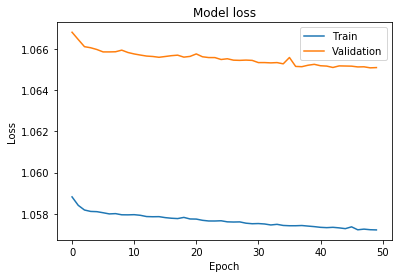

In [30]:
# Plot training & validation loss values
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

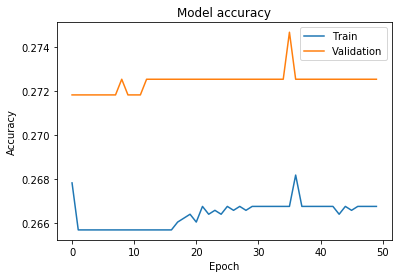

In [31]:
# Plot training & validation accuracy values
plt.plot(baseline_history.history['acc'])
plt.plot(baseline_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

### Tune hyperparameters.

Include at least the following:

- batch_size
- training epochs
- optimizer
- learning rate (if applicable to optimizer)
- momentum (if applicable to optimizer)
- activation functions
- network weight initialization
- dropout regularization
- number of neurons in the hidden layer


## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimization tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?